# Rice Disease Prediction - MobileNetV2

This notebook consists of the process of training a **Deep Neural Network** by using **MobileNetV2** by Google architecture through **Transfer Learning**.

The dataset that we use is from **Kaggle** by **Tedi Setiady** (https://www.kaggle.com/tedisetiady/leaf-rice-disease-indonesia). The dataset consists of 3 classes (**Blast, Blight, and Tungro**) with 80 images in each class.

Even though the size is only 80 images for each class, but this dataset was taken in South Sulawesi, Indonesia so that we can expect this dataset will work better in Indonesia because the symptoms of the diseases may vary for each country.



---



> **Import and install all the required library**



In [ ]:
!pip -q install tensorflowjs
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from google.colab import drive
import numpy as np
import os
import zipfile

     |████████████████████████████████| 71kB 4.3MB/s 




> **Mount Google Drive to `/drive`**



In [ ]:
drive.mount('/drive', force_remount=True)

Mounted at /drive


> **Extract the dataset from Google Drive**

In [ ]:
zip_loc = '/drive/My Drive/Datasets/dataset-tedi.zip'
zip_ref = zipfile.ZipFile(zip_loc, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

> **Prepare the ImageDataGenerator for each training, validation, and test set. And set some augmentation such as rotation range, zoom_range, flip, etc.**

In [ ]:
DATASET_DIR = 'Splitted/'
TRAINING_DIR = os.path.join(DATASET_DIR, 'train')
VALIDATION_DIR = os.path.join(DATASET_DIR, 'val')
TEST_DIR = os.path.join(DATASET_DIR, 'test')
TARGET_SIZE = (224, 224)
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=90,
    width_shift_range=.2,
    height_shift_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=90,
    width_shift_range=.2,
    height_shift_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

test_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=90,
    width_shift_range=.2,
    height_shift_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 165 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


> **Initialisation of MobileNetV2 with weights from ImageNet, and set each layer to non-trainable**

In [ ]:
mobilenet = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
mobilenet.trainable = False

> **Declare our model by taking the output of the MobileNetV2 into our model and adding a GlobalAveragePooling2D and some Hidden layer (Dense layer) with ReLU activation for each Dense layer and Softmax for the output layer**

In [ ]:
x = keras.layers.GlobalAveragePooling2D()(mobilenet.output)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(.2)(x)
x = keras.layers.Dense(3, activation='softmax')(x)

model = keras.models.Model(mobilenet.input, x)

> **Compile the model, and train for a few epoch to initialize the weights for the top layers so that we can continue to train some of top layers of MobileNetV2**

We use SGD (Stochastic Gradient Descent) optimizer because as we try to train this model using RMSprop and SGD, the SGD optimizer is better in our case.

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.optimizers.SGD(learning_rate=1e-5, momentum=.9),
    metrics=['accuracy']
)

model.fit(
    train_generator,
    epochs=5
)

Epoch 1/5
11/11 [==============================] - 5s 235ms/step - loss: 1.1871 - accuracy: 0.4303
Epoch 2/5
11/11 [==============================] - 3s 230ms/step - loss: 1.1824 - accuracy: 0.4061
Epoch 3/5
11/11 [==============================] - 3s 225ms/step - loss: 1.2334 - accuracy: 0.3152
Epoch 4/5
11/11 [==============================] - 3s 226ms/step - loss: 1.1570 - accuracy: 0.3515
Epoch 5/5
11/11 [==============================] - 3s 226ms/step - loss: 1.1939 - accuracy: 0.3333


> **Print each layer number with coresponding layer name, and plot the model overall architecture if necessary**

0 input_5 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

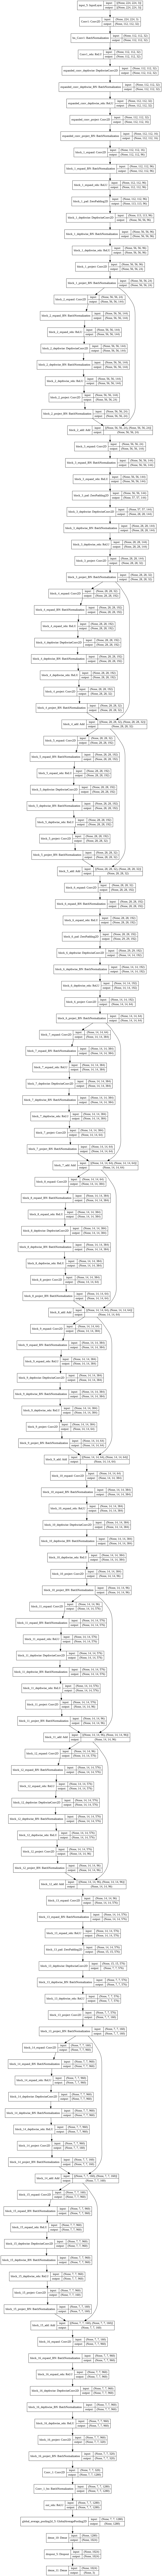

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

# To plot the model, uncomment the line below
keras.utils.plot_model(model, 'model_graph.png', show_shapes=True)

> **Set some top Convolutional layers to be trainable to fine-tune it's weights, and compile the model again. Change the number of layer to be trainable accordingly**

In [ ]:
for layer in model.layers[107:]:
    layer.trainable=True

model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=1e-5, momentum=.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

> **Train the model for 100 epochs and use EarlyStopping (for 10 patience) and ModelCheckpoint (save each epoch weights) as the callbacks**

In [ ]:
weight_filepath = "/drive/My Drive/Model Checkpoint/Rice Leaf Disease - MobileNetV2/epoch: {epoch:02d} - acc: {accuracy:.2f} - val_acc {val_accuracy:.2f}.hdf5"
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)
checkpoint = keras.callbacks.ModelCheckpoint(
    weight_filepath,
    monitor='val_accuracy',
    save_best_only=False,
    mode='auto',
    save_weights_only=True
)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100
11/11 [==============================] - 7s 453ms/step - loss: 1.2640 - accuracy: 0.3273 - val_loss: 1.0998 - val_accuracy: 0.4444
Epoch 2/100
11/11 [==============================] - 4s 349ms/step - loss: 1.2010 - accuracy: 0.3939 - val_loss: 1.1061 - val_accuracy: 0.4444
Epoch 3/100
11/11 [==============================] - 4s 350ms/step - loss: 1.2315 - accuracy: 0.3333 - val_loss: 1.0475 - val_accuracy: 0.4889
Epoch 4/100
11/11 [==============================] - 4s 339ms/step - loss: 1.2089 - accuracy: 0.3273 - val_loss: 1.0600 - val_accuracy: 0.5111
Epoch 5/100
11/11 [==============================] - 4s 340ms/step - loss: 1.1716 - accuracy: 0.3879 - val_loss: 1.1152 - val_accuracy: 0.2889
Epoch 6/100
11/11 [==============================] - 4s 342ms/step - loss: 1.1242 - accuracy: 0.3818 - val_loss: 1.0274 - val_accuracy: 0.4222
Epoch 7/100
11/11 [==============================] - 4s 340ms/step - loss: 1.1085 - accuracy: 0.4061 - val_loss: 1.0357 - val_accuracy: 0.5556

> **Plot the training result (accuracy and loss) for both training and validation values**

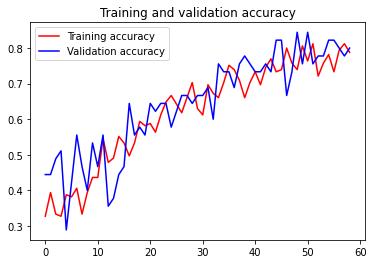

<Figure size 432x288 with 0 Axes>

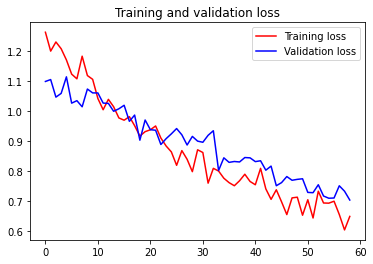

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

> **Save the model as Keras file format (.h5)**

In [ ]:
model.save('/drive/My Drive/Trained Model/rice_disease-tedi-mobilenet.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


> **Convert the Keras model into TensorFlow.js model format. Here I set the weight_shard_size_bytes to 60000000 so the weight shard file will be only one. After converting the model to TensorFlow.js format, zip the folder of converted model then copy it to Google Drive**

In [ ]:
!tensorflowjs_converter --weight_shard_size_bytes 60000000 --input_format=keras tedi-mobilenet.h5 ./tedi-mobilenet

path = 'tedi-mobilenet/'
with zipfile.ZipFile('mobilenet-json.zip', 'w', zipfile.ZIP_DEFLATED) as zipObj:
    for root, dirs, files in os.walk(path):
        for f in files:
            zipObj.write(os.path.join(root, f), os.path.relpath(os.path.join(root, f), os.path.join(path, '..')))

!cp mobilenet-json.zip '/drive/My Drive/Trained Model/rice_disease-tedi-mobilenet-js.zip'

> **Convert the Keras model into TensorFlow Lite model format, then copy the converted model to Google Drive**

In [ ]:
model = tf.keras.models.load_model('tedi-mobilenet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
tflite_model_file = 'tedi-mobilenet.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

!cp tedi-mobilenet.tflite '/drive/My Drive/Trained Model/rice_disease-tedi-mobilenet.tflite'